# Open Vaccine - projet Kaggle

## Environnement

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib
import seaborn as sns
import networkx

from collections import Counter as count
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import KFold

## Visualisation des données 

### Les données d'apprentissage

In [2]:
train = pd.read_json('train.json', lines=True)
print('Train dimensions: ', train.shape)

Train dimensions:  (2400, 19)


In [3]:
train.head(5)

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [4]:
train_verif = train.applymap(np.isreal).all(0)
train_verif

index                   True
id                     False
sequence               False
structure              False
predicted_loop_type    False
signal_to_noise         True
SN_filter               True
seq_length              True
seq_scored              True
dtype: bool

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 19 columns):
index                  2400 non-null int64
id                     2400 non-null object
sequence               2400 non-null object
structure              2400 non-null object
predicted_loop_type    2400 non-null object
signal_to_noise        2400 non-null float64
SN_filter              2400 non-null int64
seq_length             2400 non-null int64
seq_scored             2400 non-null int64
reactivity_error       2400 non-null object
deg_error_Mg_pH10      2400 non-null object
deg_error_pH10         2400 non-null object
deg_error_Mg_50C       2400 non-null object
deg_error_50C          2400 non-null object
reactivity             2400 non-null object
deg_Mg_pH10            2400 non-null object
deg_pH10               2400 non-null object
deg_Mg_50C             2400 non-null object
deg_50C                2400 non-null object
dtypes: float64(1), int64(4), object(14)
memory usage: 356.4

In [6]:
train.describe()

,index,signal_to_noise,SN_filter,seq_length,seq_scored
count,2400.000000,2400.000000,2400.000000,2400.0,2400.0
mean,1199.500000,4.530456,0.662083,107.0,68.0
std,692.964646,2.835142,0.473099,0.0,0.0
min,0.000000,-0.103000,0.000000,107.0,68.0
25%,599.750000,2.391000,0.000000,107.0,68.0
50%,1199.500000,4.442500,1.000000,107.0,68.0
75%,1799.250000,6.294250,1.000000,107.0,68.0
max,2399.000000,17.194000,1.000000,107.0,68.0


In [7]:
repart_train_score = train.groupby('seq_scored').size()
repart_train_score

seq_scored
68    2400
dtype: int64

In [8]:
repart_train_length = train.groupby('seq_length').size()
repart_train_length

seq_length
107    2400
dtype: int64

### Les données de test

In [85]:
test = pd.read_json('test.json', lines=True)
print('Test dimensions: ', test.shape)

Test dimensions:  (3634, 7)


In [10]:
test.head(5)

,index,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


In [11]:
test.describe()

,index,seq_length,seq_scored
count,3634.000000,3634.000000,3634.000000
mean,1816.500000,126.018987,87.018987
std,1049.189767,8.702624,8.702624
min,0.000000,107.000000,68.000000
25%,908.250000,130.000000,91.000000
50%,1816.500000,130.000000,91.000000
75%,2724.750000,130.000000,91.000000
max,3633.000000,130.000000,91.000000


In [12]:
repart_test_score = test.groupby('seq_scored').size()
repart_test_score

seq_scored
68     629
91    3005
dtype: int64

In [13]:
repart_test_length = test.groupby('seq_length').size()
repart_test_length

seq_length
107     629
130    3005
dtype: int64

### Le fichier de sortie

In [14]:
sub = pd.read_csv('sample_submission.csv')
print('Submission dimensions: ', sub.shape)

Submission dimensions:  (457953, 6)


In [15]:
sub.head(5)

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.0,0.0,0.0,0.0,0.0
1,id_00073f8be_1,0.0,0.0,0.0,0.0,0.0
2,id_00073f8be_2,0.0,0.0,0.0,0.0,0.0
3,id_00073f8be_3,0.0,0.0,0.0,0.0,0.0
4,id_00073f8be_4,0.0,0.0,0.0,0.0,0.0


## Visualisation graphique de la séquence pour un exemple

In [16]:
sequence = train.sequence.values[0]
structure = train.structure.values[0]
print(sequence)
print(structure)

GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUAACUGGAAUAACCCAUACCAGCAGUUAGAGUUCGCUCUAACAAAAGAAACAACAACAACAAC
.....((((((.......)))).)).((.....((..((((((....))))))..)).....))....(((((((....))))))).....................


In [17]:
%pylab inline
from RiboGraphViz import RGV

Populating the interactive namespace from numpy and matplotlib


/home/noura/miniconda3/envs/KERAS/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [18]:
rgv_objet = RGV(structure)

In [19]:
rgv_objet.get_info()

Max ladder distance: 10
n_hairpins: 4
n_internal_loops: 2
n_3WJs: 0
n_4WJs: 1
n_5WJs_up: 0


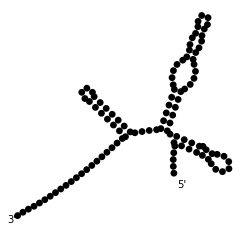

In [20]:
rgv_objet.draw()

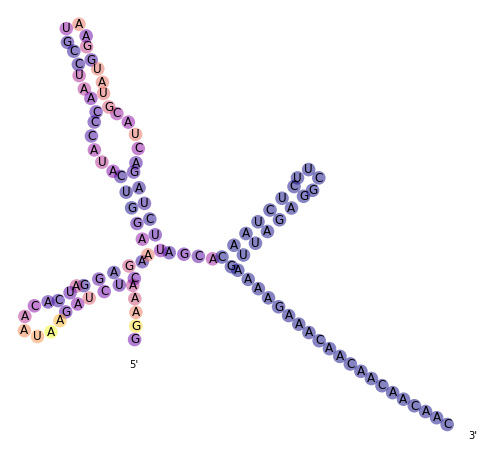

In [22]:
figure(figsize=(16,8))

reactivity = np.zeros(len(sequence))
reactivity68 = train.reactivity.values[0]
reactivity[:len(reactivity68)] = reactivity68
rna_col_react = rgv_objet.draw(c = reactivity, cmap='plasma', label = sequence, alpha = 0.5)
rna_col_react.invert_xaxis()
# jaune = forte reactivité, bleue = faible réactivité

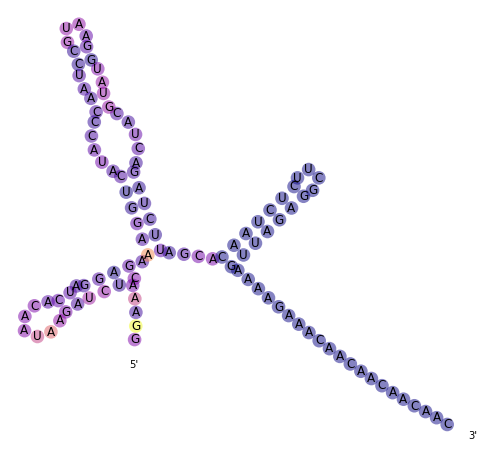

In [161]:
figure(figsize=(16,8))

deg_Mg_pH10 = np.zeros(len(sequence))
deg_Mg_pH10_68 = train.deg_Mg_pH10.values[0]
deg_Mg_pH10[:len(deg_Mg_pH10_68)] = deg_Mg_pH10_68
rna_col_react = rgv_objet.draw(c = deg_Mg_pH10, cmap='plasma', label = sequence, alpha = 0.5)
rna_col_react.invert_xaxis()
# jaune = forte deg_Mg_pH10, bleue = faible deg_Mg_pH10

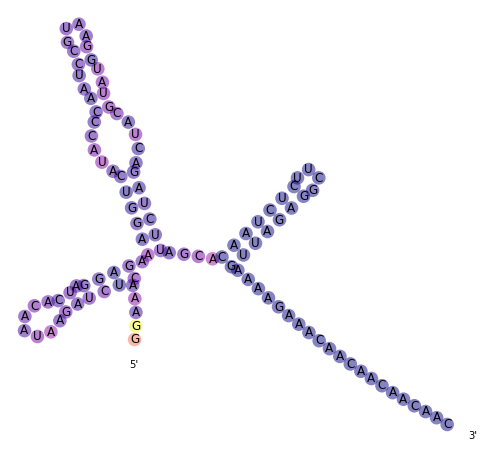

In [162]:
figure(figsize=(16,8))

deg_pH10 = np.zeros(len(sequence))
deg_pH10_68 = train.deg_pH10.values[0]
deg_pH10[:len(deg_pH10_68)] = deg_pH10_68
rna_col_react = rgv_objet.draw(c = deg_pH10, cmap='plasma', label = sequence, alpha = 0.5)
rna_col_react.invert_xaxis()
# jaune = forte deg_pH10, bleue = faible deg_pH10

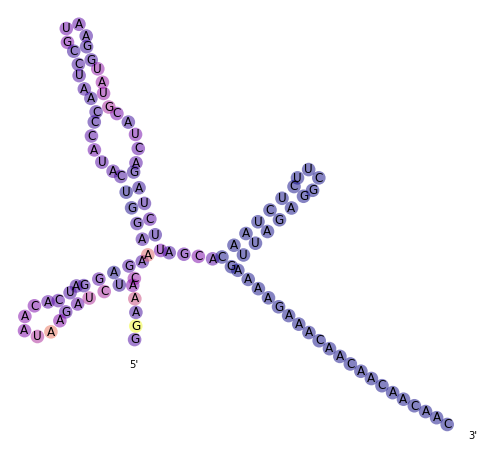

In [163]:
figure(figsize=(16,8))

deg_Mg_50C = np.zeros(len(sequence))
deg_Mg_50C_68 = train.deg_Mg_50C.values[0]
deg_Mg_50C[:len(deg_Mg_50C_68)] = deg_Mg_50C_68
rna_col_react = rgv_objet.draw(c = deg_Mg_50C, cmap='plasma', label = sequence, alpha = 0.5)
rna_col_react.invert_xaxis()
# jaune = forte deg_Mg_50C, bleue = deg_Mg_50C

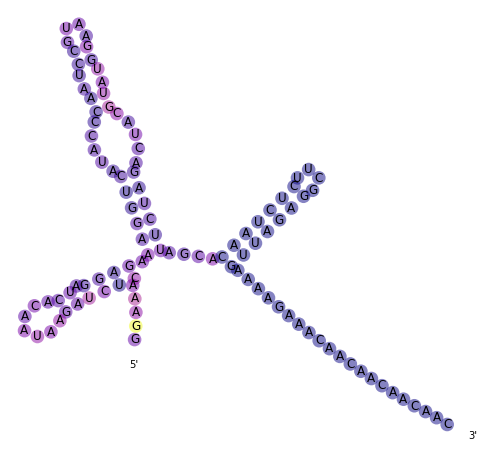

In [164]:
figure(figsize=(16,8))

deg_50C = np.zeros(len(sequence))
deg_50C_68 = train.deg_50C.values[0]
deg_50C[:len(deg_50C_68)] = deg_50C_68
rna_col_react = rgv_objet.draw(c = deg_50C, cmap='plasma', label = sequence, alpha = 0.5)
rna_col_react.invert_xaxis()
# jaune = forte deg_50C, bleue = deg_50C

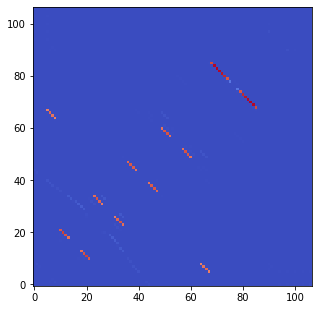

In [23]:
figure(figsize=(5,6))

matrice = np.load('id_0a2bbe37e.npy')
plt.imshow(matrice, origin='lower left', cmap='coolwarm')

## Filtration des données d'apprentissage en fonction des critères qualités

In [24]:
repart_train_filtre = train.groupby('SN_filter').size()
repart_train_filtre

SN_filter
0     811
1    1589
dtype: int64

In [25]:
train_f = train[train.SN_filter==1]
train_f.shape

(1589, 19)

In [26]:
repart_train_f_filtre = train_f.groupby('SN_filter').size()
repart_train_f_filtre

SN_filter
1    1589
dtype: int64

## Exploration des séquences et structures pour le jeux d'apprentissage

### Composition en nucléotides

In [27]:
sample = train_f.iloc[0]

In [28]:
sample['sequence']

'GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUAACUGGAAUAACCCAUACCAGCAGUUAGAGUUCGCUCUAACAAAAGAAACAACAACAACAAC'

In [29]:
dict(count(sample['sequence']))

{'G': 19, 'A': 45, 'C': 23, 'U': 20}

In [30]:
bases = []
for i in range(len(train_f)):
    counts = dict(count(train_f.iloc[i]['sequence']))
    bases.append((
        counts['A'] / 107,
        counts['G'] / 107,
        counts['C'] / 107,
        counts['U'] / 107
    ))
    
bases = pd.DataFrame(bases, columns=['A_percent', 'G_percent', 'C_percent', 'U_percent'])
bases

,A_percent,G_percent,C_percent,U_percent
0,0.420561,0.177570,0.214953,0.186916
1,0.401869,0.224299,0.186916,0.186916
2,0.317757,0.308411,0.308411,0.065421
3,0.383178,0.224299,0.224299,0.168224
4,0.345794,0.261682,0.252336,0.140187
...,...,...,...,...
1584,0.355140,0.261682,0.252336,0.130841
1585,0.383178,0.242991,0.214953,0.158879
1586,0.439252,0.205607,0.168224,0.186916
1587,0.672897,0.056075,0.196262,0.074766


In [63]:
names = ['A_percent', 'G_percent', 'C_percent', 'U_percent']
values = [mean(bases['A_percent']), mean(bases['G_percent']), mean(bases['C_percent']), mean(bases['U_percent'])]

values

[0.3868947142445434,
 0.24156731736294537,
 0.2193585573716496,
 0.15217941102086147]

In [65]:
import plotly.express as px

fig = px.bar(
    df,
    x= names, 
    y= values,
    orientation='v', 
    title='Composition moyenne en nucléotide', 
    height=600, 
    width=800
)
fig.show()

### Composition structurale

In [124]:
sample['structure']

'.....((((((.......)))).)).((.....((..((((((....))))))..)).....))....(((((((....))))))).....................'

In [125]:
dict(count(sample['structure']))

{'.': 61, '(': 23, ')': 23}

In [53]:
unit = []
for i in range(len(train_f)):
    counts = dict(count(train_f.iloc[i]['structure']))
    unit.append((
        counts['.'] / 107,
        counts['('] / 107,
        counts[')'] / 107,
    ))
    
unit = pd.DataFrame(unit, columns=['._percent', '(_percent', ')_percent'])
unit

,._percent,(_percent,)_percent
0,0.570093,0.214953,0.214953
1,0.551402,0.224299,0.224299
2,0.532710,0.233645,0.233645
3,0.495327,0.252336,0.252336
4,0.420561,0.289720,0.289720
...,...,...,...
1584,0.401869,0.299065,0.299065
1585,0.495327,0.252336,0.252336
1586,0.644860,0.177570,0.177570
1587,0.869159,0.065421,0.065421


In [67]:
names = ['._percent', '(_percent', ')_percent']
values = [mean(unit['._percent']), mean(unit['(_percent']), mean(unit[')_percent'])]

values

[0.5303929468366013, 0.23480352658169926, 0.23480352658169926]

In [69]:
fig = px.bar(
    df,
    x= names, 
    y= values,
    orientation='v', 
    title='Composition structurale moyenne',
    height=600, 
    width=800
)
fig.show()

In [133]:
pairs_level = []

for j in range(len(train_f)):
    res = dict(count(train_f.iloc[j]['structure']))
    pairs_level.append(res['('] / 53.5)
    
pairs_level = pd.DataFrame(pairs_level, columns=['pairs_level'])
pairs_level

,pairs_level
0,0.429907
1,0.448598
2,0.467290
3,0.504673
4,0.579439
...,...
1584,0.598131
1585,0.504673
1586,0.355140
1587,0.130841


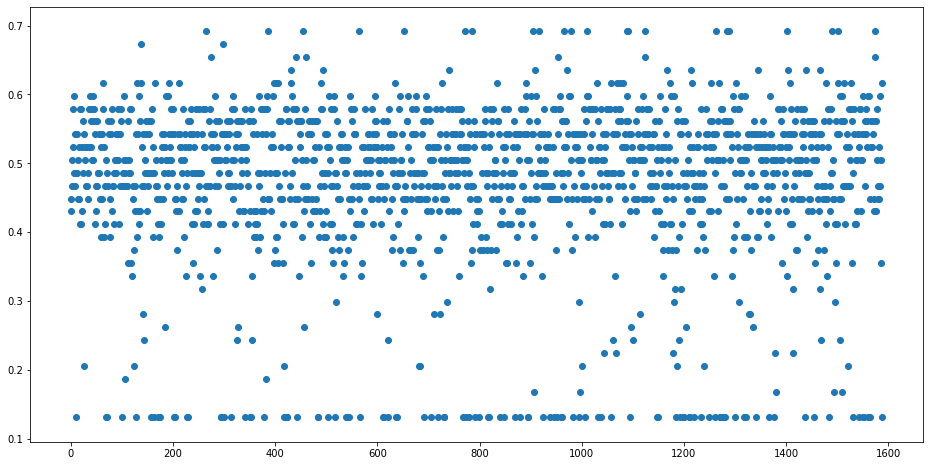

In [82]:
figure(figsize=(16,8))
plt.scatter(x=range(len(pairs_level)), y=pairs_level.values)

In [55]:
sample['predicted_loop_type']

'EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHHHSSSSSSIISSIIIIISSXXXXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE'

In [70]:
dict(count(sample['predicted_loop_type']))

{'E': 26, 'S': 46, 'H': 15, 'B': 1, 'X': 5, 'I': 14}

In [122]:
loops = []
for j in range(len(train_f)):
    counts = dict(count(train_f.iloc[j]['predicted_loop_type']))
    available = ['E', 'S', 'H', 'B', 'X', 'I', 'M']
    row = []
    for item in available:
        try:
            row.append(counts[item] / 107)
        except:
            row.append(0)
    loops.append(row)
    
loops = pd.DataFrame(loops, columns=available)
loops

,E,S,H,B,X,I,M
0,0.242991,0.429907,0.140187,0.009346,0.046729,0.130841,0.000000
1,0.242991,0.448598,0.140187,0.000000,0.009346,0.112150,0.046729
2,0.242991,0.467290,0.186916,0.000000,0.046729,0.037383,0.018692
3,0.280374,0.504673,0.074766,0.000000,0.037383,0.102804,0.000000
4,0.242991,0.579439,0.074766,0.000000,0.009346,0.093458,0.000000
...,...,...,...,...,...,...,...
1584,0.242991,0.598131,0.112150,0.028037,0.000000,0.000000,0.018692
1585,0.252336,0.504673,0.074766,0.037383,0.037383,0.093458,0.000000
1586,0.271028,0.355140,0.214953,0.000000,0.112150,0.046729,0.000000
1587,0.831776,0.130841,0.037383,0.000000,0.000000,0.000000,0.000000


In [123]:
names = ['E', 'S', 'H', 'B', 'X', 'I', 'M']
values = [mean(loops['E']), mean(loops['S']), mean(loops['H']), mean(loops['B']), mean(loops['X']),
          mean(loops['I']), mean(loops['M'])]

values

[0.3018121077736539,
 0.4696070531633985,
 0.11776053828011437,
 0.013086464772413067,
 0.024026161166430228,
 0.052269398846038165,
 0.02143827599795312]

In [124]:
fig = px.bar(
    df,
    x= names, 
    y= values,
    orientation='v', 
    title='Composition structurale moyenne (code lettre)',
    height=600, 
    width=800
)
fig.show()

## Exploration des séquences et structures pour le jeux test

### Composition en nucléotides

In [95]:
test_f = test[test.seq_length==107]
test_f.head(5)

,index,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
2,2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
18,18,id_00ca60e44,GGAAAGCAGGAGGCCGAGGAUCCUGCGCUAUGAGGAAACCAUAGAC...,.....((.((.((.((.(((((((((((((((.(....)))))).)...,EEEEESSBSSISSISSISSSSSSSSSSSSSSSBSHHHHSSSSSSBS...,107,68
23,23,id_00e99b69c,GGAAAUUUUAGAUUGCACACAGUCAGGUAGUUAAAAUUAGGCCACC...,..........(((((....)))))((((.(((....(((((........,EEEEEEEEEESSSSSHHHHSSSSSSSSSISSSIIIISSSSSHHHHH...,107,68


In [96]:
test_f.describe()

,index,seq_length,seq_scored
count,629.000000,629.0,629.0
mean,1798.036566,107.0,68.0
std,1043.635572,0.0,0.0
min,0.000000,107.0,68.0
25%,870.000000,107.0,68.0
50%,1851.000000,107.0,68.0
75%,2683.000000,107.0,68.0
max,3627.000000,107.0,68.0


In [102]:
sample = test_f.iloc[0]

In [103]:
sample['sequence']

'GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAAUGGUCAAAGAGGUCGAAAUACAGAUGACCUUCGGGUUAUCAAAAGAAACAACAACAACAAC'

In [104]:
dict(count(sample['sequence']))

{'G': 22, 'A': 47, 'U': 18, 'C': 20}

In [97]:
bases = []
for i in range(len(test_f)):
    counts = dict(count(test_f.iloc[i]['sequence']))
    bases.append((
        counts['A'] / 107,
        counts['G'] / 107,
        counts['C'] / 107,
        counts['U'] / 107
    ))
    
bases = pd.DataFrame(bases, columns=['A_percent', 'G_percent', 'C_percent', 'U_percent'])
bases

,A_percent,G_percent,C_percent,U_percent
0,0.439252,0.205607,0.186916,0.168224
1,0.420561,0.271028,0.224299,0.084112
2,0.336449,0.280374,0.233645,0.149533
3,0.373832,0.252336,0.271028,0.102804
4,0.383178,0.196262,0.242991,0.177570
...,...,...,...,...
624,0.392523,0.224299,0.233645,0.149533
625,0.467290,0.168224,0.186916,0.177570
626,0.607477,0.112150,0.093458,0.186916
627,0.364486,0.271028,0.186916,0.177570


In [98]:
names = ['A_percent', 'G_percent', 'C_percent', 'U_percent']
values = [mean(bases['A_percent']), mean(bases['G_percent']), mean(bases['C_percent']), mean(bases['U_percent'])]

values

[0.3960447528341977,
 0.2384886260642173,
 0.22107484064603342,
 0.14439178045555168]

In [99]:
import plotly.express as px

fig = px.bar(
    df,
    x= names, 
    y= values,
    orientation='v', 
    title='Composition moyenne en nucléotide', 
    height=600, 
    width=800
)
fig.show()

### Composition structurale

In [105]:
sample['structure']

'......((((((((((.(((((.....))))))))((((((((...)))))...)))))))...))).(((((((....))))))).....................'

In [106]:
dict(count(sample['structure']))

{'.': 47, '(': 30, ')': 30}

In [107]:
unit = []
for i in range(len(test_f)):
    counts = dict(count(train_f.iloc[i]['structure']))
    unit.append((
        counts['.'] / 107,
        counts['('] / 107,
        counts[')'] / 107,
    ))
    
unit = pd.DataFrame(unit, columns=['._percent', '(_percent', ')_percent'])
unit

,._percent,(_percent,)_percent
0,0.570093,0.214953,0.214953
1,0.551402,0.224299,0.224299
2,0.532710,0.233645,0.233645
3,0.495327,0.252336,0.252336
4,0.420561,0.289720,0.289720
...,...,...,...
624,0.457944,0.271028,0.271028
625,0.457944,0.271028,0.271028
626,0.495327,0.252336,0.252336
627,0.476636,0.261682,0.261682


In [108]:
names = ['._percent', '(_percent', ')_percent']
values = [mean(unit['._percent']), mean(unit['(_percent']), mean(unit[')_percent'])]

values

[0.5295900628500948, 0.23520496857495257, 0.23520496857495257]

In [111]:
fig = px.bar(
    df,
    x= names, 
    y= values,
    orientation='v', 
    title='Composition structurale moyenne',
    height=600, 
    width=800
)
fig.show()

In [134]:
pairs_level_t = []

for j in range(len(test_f)):
    res = dict(count(test_f.iloc[j]['structure']))
    pairs_level_t.append(res['('] / 53.5)
    
pairs_level_t = pd.DataFrame(pairs_level_t, columns=['pairs_level'])
pairs_level_t

,pairs_level
0,0.560748
1,0.411215
2,0.523364
3,0.579439
4,0.448598
...,...
624,0.542056
625,0.373832
626,0.317757
627,0.504673


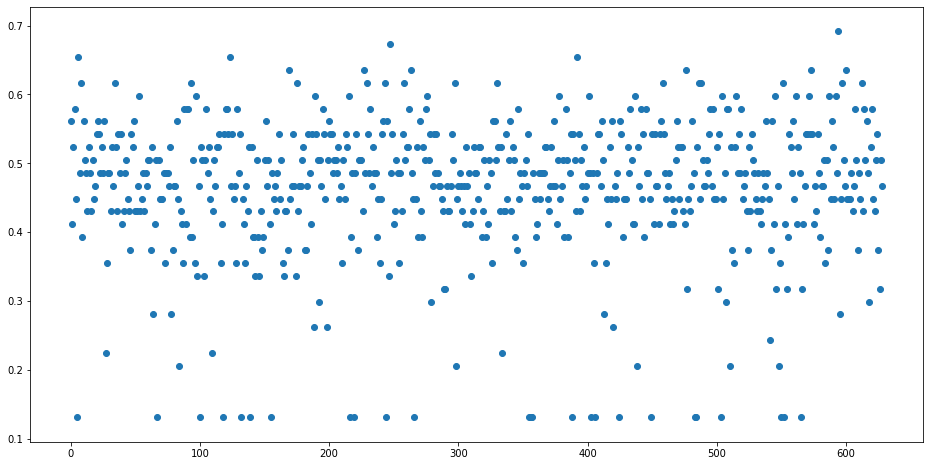

In [135]:
figure(figsize=(16,8))
plt.scatter(x=range(len(pairs_level_t)), y=pairs_level_t.values)

In [114]:
sample['predicted_loop_type']

'EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHHSSSSSBBBSSSSSSSBBBSSSXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE'

In [115]:
dict(count(sample['predicted_loop_type']))

{'E': 27, 'S': 60, 'B': 7, 'H': 12, 'X': 1}

In [119]:
loops = []
for j in range(len(test_f)):
    counts = dict(count(test_f.iloc[j]['predicted_loop_type']))
    available = ['E', 'S', 'H', 'B', 'X', 'I', 'M']
    row = []
    for item in available:
        try:
            row.append(counts[item] / 107)
        except:
            row.append(0)
    loops.append(row)
    
loops = pd.DataFrame(loops, columns=available)
loops

,E,S,H,B,X,I,M
0,0.252336,0.560748,0.112150,0.065421,0.009346,0.000000,0.000000
1,0.299065,0.411215,0.065421,0.000000,0.056075,0.168224,0.000000
2,0.252336,0.523364,0.112150,0.000000,0.000000,0.056075,0.056075
3,0.242991,0.579439,0.074766,0.037383,0.000000,0.065421,0.000000
4,0.289720,0.448598,0.149533,0.000000,0.000000,0.084112,0.028037
...,...,...,...,...,...,...,...
624,0.252336,0.542056,0.140187,0.000000,0.000000,0.000000,0.065421
625,0.271028,0.373832,0.158879,0.009346,0.000000,0.000000,0.186916
626,0.317757,0.317757,0.364486,0.000000,0.000000,0.000000,0.000000
627,0.242991,0.504673,0.121495,0.009346,0.028037,0.093458,0.000000


In [120]:
names = ['E', 'S', 'H', 'B', 'X', 'I', 'M']
values = [mean(loops['E']), mean(loops['S']), mean(loops['H']), mean(loops['B']), mean(loops['X']),
          mean(loops['I']), mean(loops['M'])]

values

[0.2876691975097705,
 0.4625053860897745,
 0.13121257596243868,
 0.012005408377041109,
 0.025377769193052287,
 0.05675824257462505,
 0.024471420293300423]

In [121]:
fig = px.bar(
    df,
    x= names, 
    y= values,
    orientation='v', 
    title='Composition structurale moyenne (code lettre)',
    height=600, 
    width=800
)
fig.show()

## Préparation des données

### Les données d'apprentissage

In [189]:
train = pd.concat([train_f, pairs_level, bases, unit, loops], axis=1)
train.head(5)

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,...,._percent,(_percent,)_percent,E,S,H,B,X,I,M
0,0.0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1.0,107.0,68.0,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...",...,0.570093,0.214953,0.214953,0.242991,0.429907,0.140187,0.009346,0.046729,0.130841,0.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.551402,0.224299,0.224299,0.242991,0.448598,0.140187,0.000000,0.009346,0.112150,0.046729
2,2.0,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1.0,107.0,68.0,"[0.0931, 0.13290000000000002, 0.11280000000000...",...,0.532710,0.233645,0.233645,0.242991,0.467290,0.186916,0.000000,0.046729,0.037383,0.018692
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.495327,0.252336,0.252336,0.280374,0.504673,0.074766,0.000000,0.037383,0.102804,0.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.420561,0.289720,0.289720,0.242991,0.579439,0.074766,0.000000,0.009346,0.093458,0.000000


In [190]:
train.columns

Index(['index', 'id', 'sequence', 'structure', 'predicted_loop_type',
       'signal_to_noise', 'SN_filter', 'seq_length', 'seq_scored',
       'reactivity_error', 'deg_error_Mg_pH10', 'deg_error_pH10',
       'deg_error_Mg_50C', 'deg_error_50C', 'reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C', 'pairs_level', 'A_percent',
       'G_percent', 'C_percent', 'U_percent', '._percent', '(_percent',
       ')_percent', 'E', 'S', 'H', 'B', 'X', 'I', 'M'],
      dtype='object')

In [193]:
train_data = []
for mol_id in train['id'].unique():
    sample_data = train.loc[train['id'] == mol_id]
    for i in range(68):
        sample_tuple = (
                    sample_data['id'].values[0],
                    sample_data['sequence'].values[0][i],
                    sample_data['structure'].values[0][i], 
                    sample_data['predicted_loop_type'].values[0][i],
                    sample_data['reactivity'].values[0][i], 
                    sample_data['reactivity_error'].values[0][i],
                    sample_data['deg_Mg_pH10'].values[0][i], 
                    sample_data['deg_error_Mg_pH10'].values[0][i],
                    sample_data['deg_pH10'].values[0][i], 
                    sample_data['deg_error_pH10'].values[0][i],
                    sample_data['deg_Mg_50C'].values[0][i], 
                    sample_data['deg_error_Mg_50C'].values[0][i],
                    sample_data['deg_50C'].values[0][i], 
                    sample_data['deg_error_50C'].values[0][i],
                    sample_data['A_percent'].values[0], 
                    sample_data['G_percent'].values[0],
                    sample_data['C_percent'].values[0], 
                    sample_data['U_percent'].values[0],
                    sample_data['E'].values[0],
                    sample_data['S'].values[0], 
                    sample_data['H'].values[0],
                    sample_data['B'].values[0], 
                    sample_data['X'].values[0],
                    sample_data['I'].values[0], 
                    sample_data['M'].values[0],
                    sample_data['pairs_level'].values[0])
        train_data.append(sample_tuple)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [179]:
seq = pd.get_dummies(train_data['sequence'], prefix='Base')
struc = pd.get_dummies(train_data['structure'], prefix='Structure')
loop = pd.get_dummies(train_data['predicted_loop_type'], prefix='Loop')

train_data = pd.concat([seq, struc, loop, train_data], axis=1)
train_data = train_data.drop(['sequence', 'structure', 'predicted_loop_type'], axis=1)

In [180]:
train_data.head(5)

,Base_GGAAAAACAUCAAUCUAAACCAAAGGGAUAAAUUAACGAAAGAAGGAAGUAUGUCAAGAAUUCGAUGACUAUAUGUUCGCAUAUAGAAAAGAAACAACAACAACAAC,Base_GGAAAAACCACCUAAAAGGUGGUACUCUGGAUACAGAGACUCUGGAUACAGAGAAAAUAAAUAACAGCGGUGCAUUUCGAUGCGCCAAAAGAAACAACAACAACAAC,Base_GGAAAAACCACCUAAAAGGUGGUACUCUGGAUACAGAGACUCUGGAUACAGAGGUCUGGAGACAGACAGGUGCCUUUCGAGGCGCCAAAAGAAACAACAACAACAAC,Base_GGAAAAACCACCUAAAAGGUGGUACUCUGGAUACAGAGUCUCUGGAUACAGAGGUCUGGAGACAGACAGGUGCCUUUCGAGGCACCAAAAGAAACAACAACAACAAC,Base_GGAAAAACCAGGAGUCAGCGACGAACGGGAAGCUCAAUUAGAGCACCCACGGCGCGCAAGACGACUGGCCCAGAGUUCGCUCUGGGAAAAGAAACAACAACAACAAC,Base_GGAAAAACCAGGAGUGAGACACGUUGGAGGAGCUCAAUUAGAGCACCGACAACGCGCUACACCACUGGCCGAGAGUUCGCUCUCGGAAAAGAAACAACAACAACAAC,Base_GGAAAAACGCGCGCACAUAACACGACAUGCUGGGAUGAGGUGCGGCACUCGUCACUUAUCACUGUGCCAAUAGACUUCGGUCUAUUAAAAGAAACAACAACAACAAC,Base_GGAAAAACGCGCGCACAUAACACGACAUGCUGGGAUGAGGUGCGGCACUCGUCACUUAUGACGGUGCCAAUGGGCUUCGGUCUGUUAAAAGAAACAACAACAACAAC,Base_GGAAAAACGCGCGCACAUGACACGACAUGCUGGAAUGAGGUGCGGCACUCGUCACUUAUCACUGUGCCAAUAGUCUUCGGACUAUUAAAAGAAACAACAACAACAAC,Base_GGAAAAACGCGGGCACAGGACACUGCAGAGUGGACUGGGCUGCGUCACUCGUCACUUAUGACGGUGACACUGCGCUUCGGUGUGGUAAAAGAAACAACAACAACAAC,...,._percent,(_percent,)_percent,E,S,H,B,X,I,M
0,0,0,0,0,0,0,0,0,0,0,...,0.570093,0.214953,0.214953,0.242991,0.429907,0.140187,0.009346,0.046729,0.130841,0.000000
1,0,0,0,0,0,0,0,0,0,0,...,0.551402,0.224299,0.224299,0.242991,0.448598,0.140187,0.000000,0.009346,0.112150,0.046729
2,0,0,0,0,0,0,0,0,0,0,...,0.532710,0.233645,0.233645,0.242991,0.467290,0.186916,0.000000,0.046729,0.037383,0.018692
3,0,0,0,0,0,0,0,0,0,0,...,0.495327,0.252336,0.252336,0.280374,0.504673,0.074766,0.000000,0.037383,0.102804,0.000000
4,0,0,0,0,0,0,0,0,0,0,...,0.420561,0.289720,0.289720,0.242991,0.579439,0.074766,0.000000,0.009346,0.093458,0.000000


In [168]:
train_data.info

<bound method DataFrame.info of        index                                           sequence  \
0        0.0  GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...   
1        NaN                                                NaN   
2        2.0  GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...   
3        NaN                                                NaN   
4        NaN                                                NaN   
...      ...                                                ...   
2392  2392.0  GGAAACUCCACAUCUCUACGCCACGAAAGUGGGUAGGAUGGGAGAG...   
2393  2393.0  GGAAAAGAUCGAUAGGUACGUGGGUUCAUGUAGGAAACUAGCUGGC...   
2395  2395.0  GGAAAAUAGCAGAGGAAAUACUAGAGCAAUUGCAAAGGCCGAUCAU...   
2396  2396.0  GGAAAACAAAAACAAACAACAAAAACAAACAACAAAAACAAACAAC...   
2399  2399.0  GGAAAGCUAGGACGUGGGAGCGUAGCUCUCCACACGGGUACGCCAA...   

                                              structure  \
0     .....((((((.......)))).)).((.....((..((((((......   
1                                            

In [154]:
train_data = train_data.drop(['id', 'index', 'signal_to_noise', 'SN_filter', ], axis=1)
train_data.columns

Index(['index', 'sequence', 'structure', 'predicted_loop_type',
       'signal_to_noise', 'SN_filter', 'seq_length', 'seq_scored',
       'reactivity_error', 'deg_error_Mg_pH10', 'deg_error_pH10',
       'deg_error_Mg_50C', 'deg_error_50C', 'reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C', 'pairs_level', 'A_percent',
       'G_percent', 'C_percent', 'U_percent', '._percent', '(_percent',
       ')_percent', 'E', 'S', 'H', 'B', 'X', 'I', 'M'],
      dtype='object')